# **1. Perkenalan Dataset**


### 1. Deskripsi Dataset
**Sumber Dataset**: [Pima Indians Diabetes Database (Kaggle)](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Dataset ini berasal dari *National Institute of Diabetes and Digestive and Kidney Diseases*. Tujuan utama dari dataset ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang terdapat di dalam dataset.

Beberapa batasan diterapkan dalam pemilihan sampel ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah **perempuan berusia minimal 21 tahun dari keturunan Indian Pima**.

### 2. Informasi Atribut (Data Dictionary)
Dataset ini mencakup atribut-atribut berikut:

* **Pregnancies (Kehamilan)**: Jumlah berapa kali hamil.
* **Glucose (Glukosa)**: Konsentrasi glukosa plasma setelah 2 jam dalam tes toleransi glukosa oral.
* **BloodPressure (Tekanan Darah)**: Tekanan darah diastolik (mm Hg).
* **SkinThickness (Ketebalan Kulit)**: Ketebalan lipatan kulit trisep (mm).
* **Insulin**: Serum insulin 2 jam (mu U/ml).
* **BMI**: Indeks Massa Tubuh (berat dalam kg / (tinggi dalam m)²).
* **DiabetesPedigreeFunction**: Fungsi silsilah (*pedigree*) diabetes (fungsi yang menyajikan skor kemungkinan diabetes berdasarkan riwayat keluarga).
* **Age (Usia)**: Usia (tahun).
* **Outcome (Hasil)**: Variabel kelas target (0 atau 1).
    * `1`: Positif Diabetes (268 data)
    * `0`: Negatif Diabetes (sisanya)


# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [3]:
df = pd.read_csv('C:/Users/ASUS/PROGRAMMING LANGUAGE/SMSL_Novsyafira-Azzahyra/Eksperimen_SML_Novsyafira-Azzahyra/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

In [4]:
print("Jumlah baris dan kolom:", df.shape, "\n")

Jumlah baris dan kolom: (768, 9) 



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


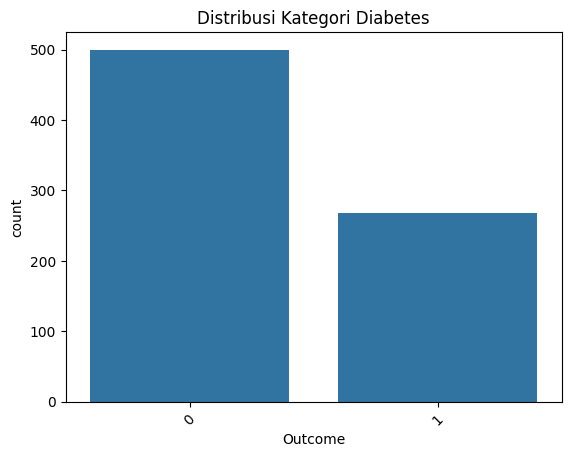

In [7]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Kategori Diabetes")
plt.xticks(rotation=45)
plt.show()

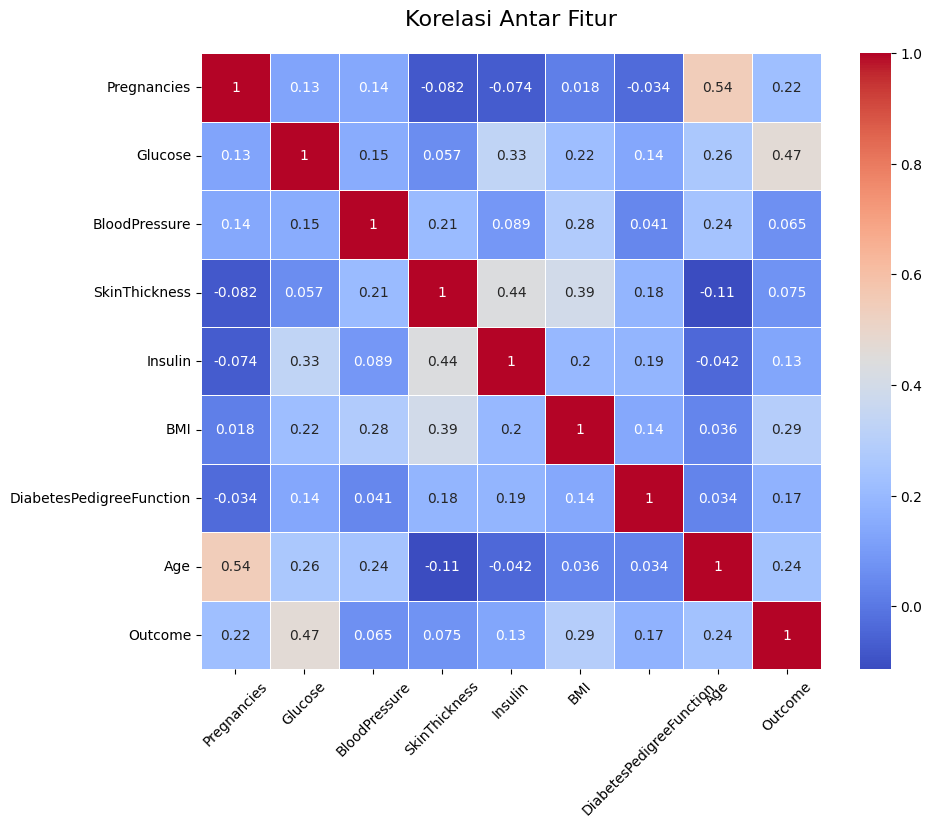

In [8]:
df_corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_corr, 
    annot=True,      
    cmap='coolwarm',      
    linewidths=0.5,  
    annot_kws={"size": 10} 
)
plt.title("Korelasi Antar Fitur", fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0) 
plt.show()

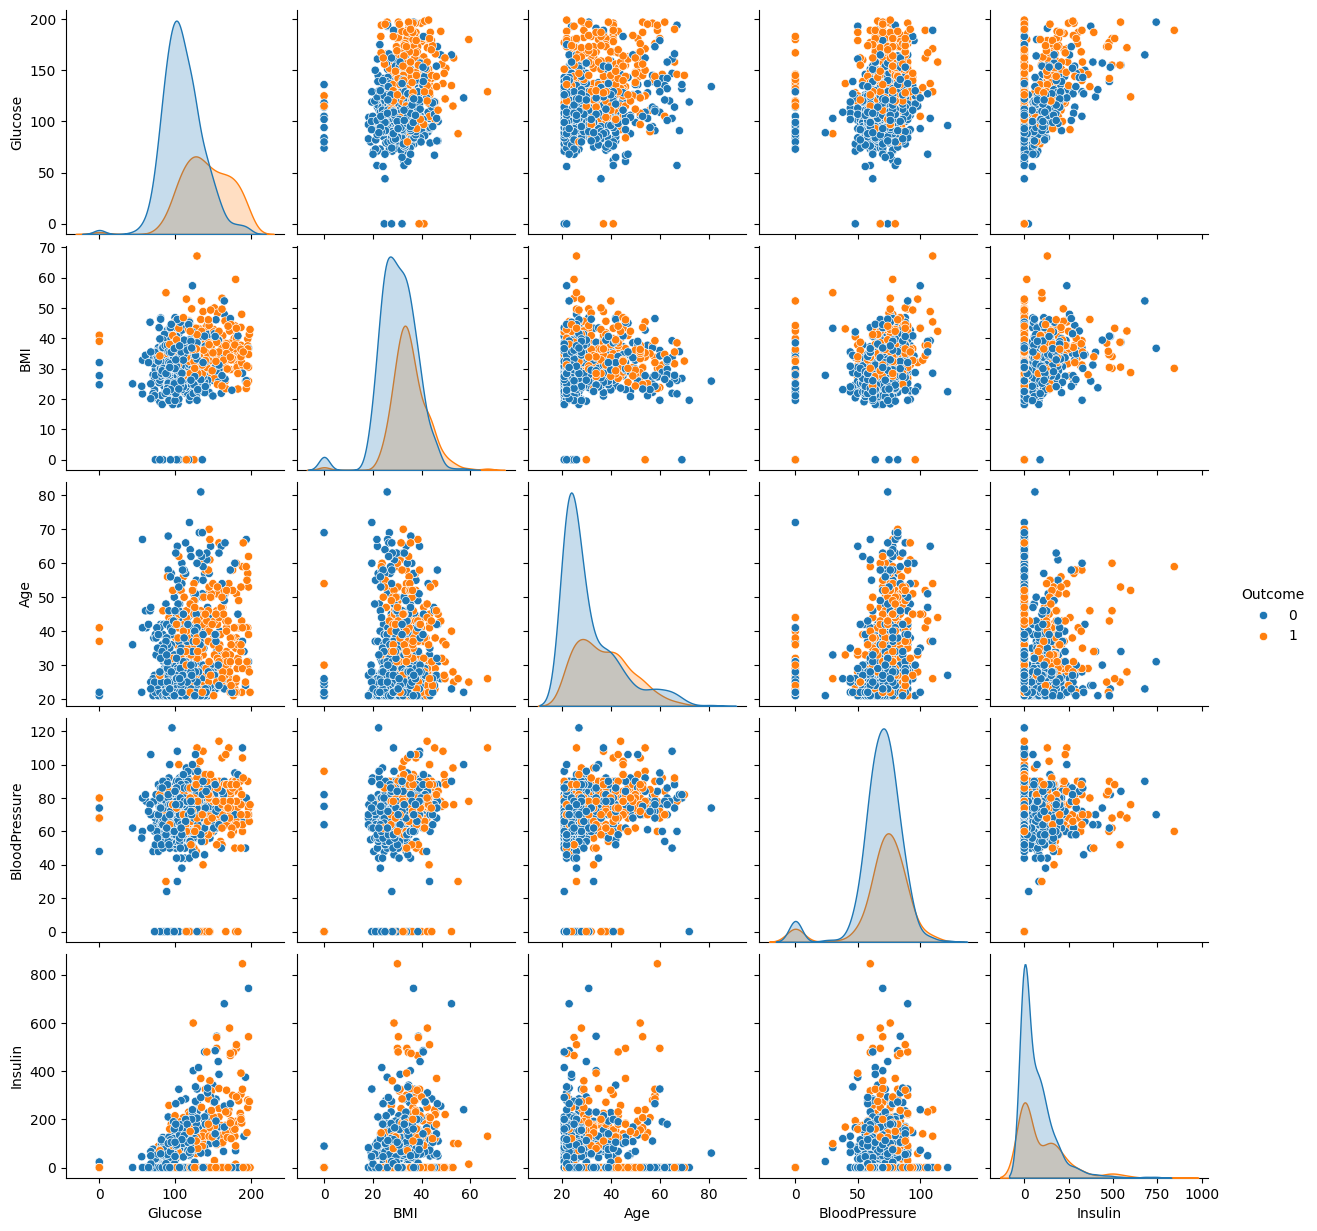

In [9]:
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin'], hue='Outcome')
plt.show()

# **5. Data Preprocessing**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [13]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].index.tolist()
    return outliers

outliers_glucose = detect_outliers_iqr(df['Glucose'])
outliers_bp = detect_outliers_iqr(df['BloodPressure'])
outliers_bmi = detect_outliers_iqr(df['BMI'])
outliers_age = detect_outliers_iqr(df['Age'])
outliers_insulin = detect_outliers_iqr(df['Insulin'])

all_outliers = list(set(outliers_glucose + outliers_bp + outliers_bmi + outliers_age + outliers_insulin))

print(f"Jumlah data outlier yang terdeteksi: {len(all_outliers)}")
print(f"Persentase outlier: {(len(all_outliers) / len(df)) * 100:.2f}%")

Jumlah data outlier yang terdeteksi: 99
Persentase outlier: 12.89%


In [14]:
df.drop(index=all_outliers, inplace=True)

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah discaling (5 baris pertama):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Data setelah discaling (5 baris pertama):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.636453  0.951073      -0.008140       0.906327 -0.833342  0.235321   
1    -0.848160 -1.172292      -0.535163       0.520742 -0.833342 -0.854373   
2     1.230297  2.130721      -0.710837      -1.342920 -0.833342 -1.368085   
3    -0.848160 -1.037475      -0.535163       0.135157  0.340460 -0.620867   
4    -1.145082  0.580327      -2.818927       0.906327  1.264516  1.714190   

   DiabetesPedigreeFunction       Age  
0                  0.505295  1.536006  
1                 -0.367382 -0.171548  
2                  0.647579 -0.081677  
3                 -0.949167 -1.070260  
4                  5.757168  0.008195  


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
     